In [1]:
### test analysis module
os.getcwd()
import pydrodelta.analysis 
import json
import matplotlib.pyplot as plt


In [2]:

#### instantiate boundarySet class from config file (.xml)
bordes_config = json.load(open("pydrodelta_config/288_short.json"))
bordes_set = pydrodelta.analysis.BoundarySet(bordes_config)
bordes_set


In [3]:
#### validate configuration
import jsonschema
schema = open("schemas/boundary-set.json")
schema = json.load(schema)
try:
    jsonschema.validate(instance=bordes_config,schema=schema)
except jsonschema.exceptions.ValidationError as err:
    print(err)
print("Given JSON data is Valid")


Given JSON data is Valid


In [4]:
#### load data
bordes_set.loadData()
# print(len(bordes_set.boundaries))
# for boundary in bordes_set.boundaries:
#     if len(boundary.series):
#         print(len(boundary.series))
#         for serie in boundary.series:
#             if len(serie.obs_df):
#                 print(len(serie.obs_df))


In [5]:
### sanitize timeseries
bordes_set.removeOutliers()
bordes_set.detectJumps()
bordes_set.regularize()
bordes_set.applyOffset()

Detecta Outliers:
Limite superior 4.62
Limite inferior -2.25
Cantidad de outliers:  0
Detecta Outliers:
Limite superior 5.0
Limite inferior -3.03
Cantidad de outliers:  0
Detecta Outliers:
Limite superior 4.18
Limite inferior -1.82
Cantidad de outliers:  0
Detecta Outliers:
Limite superior 3.42
Limite inferior -1.7
Cantidad de outliers:  0
Detecta Outliers:
Limite superior 2.66
Limite inferior -2.01
Cantidad de outliers:  0
Detecta Outliers:
Limite superior 4.62
Limite inferior -2.25
Cantidad de outliers:  0
Detecta Outliers:
Limite superior 1000.0
Limite inferior 0.0
Cantidad de outliers:  0
Detecta Outliers:
Limite superior 10000.0
Limite inferior 0.0
Cantidad de outliers:  0
Detecta Outliers:
Limite superior 8.0
Limite inferior -1.5
Cantidad de outliers:  0
Detecta Outliers:
Limite superior 8.0
Limite inferior -1.5
Cantidad de outliers:  0
Detecta Outliers:
Limite superior 8.0
Limite inferior -1.5
Cantidad de outliers:  0
Detecta Outliers:
Limite superior 3.42
Limite inferior -1.7
C

In [6]:
#### fill nulls
bordes_set.fillNulls()


In [16]:
#### derive
bordes_set.derive()

Deriving 31521 from Nueva Palmira - Stage Hydrograph -1H
Interpolating 31524 from San Fernando - Stage Hydrograph - 1H and Nueva Palmira - Stage Hydrograph -1H
Interpolating 31523 from San Fernando - Stage Hydrograph - 1H and Nueva Palmira - Stage Hydrograph -1H
Interpolating 31522 from San Fernando - Stage Hydrograph - 1H and Nueva Palmira - Stage Hydrograph -1H
Interpolating 31526 from San Fernando - Stage Hydrograph - 1H and Nueva Palmira - Stage Hydrograph -1H
Interpolating 31527 from San Fernando - Stage Hydrograph - 1H and Nueva Palmira - Stage Hydrograph -1H
Deriving 31528 from San Fernando - Stage Hydrograph - 1H
Interpolating 31529 from San Fernando - Stage Hydrograph - 1H and Nueva Palmira - Stage Hydrograph -1H
Deriving 31532 from Nueva Palmira - Stage Hydrograph -1H
Interpolating 31533 from San Fernando - Stage Hydrograph - 1H and Nueva Palmira - Stage Hydrograph -1H
Interpolating 31535 from San Fernando - Stage Hydrograph - 1H and Nueva Palmira - Stage Hydrograph -1H


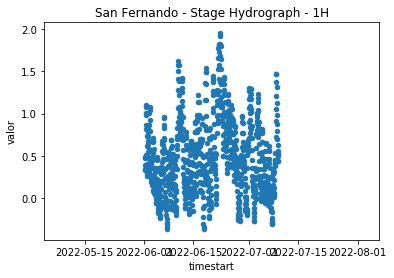

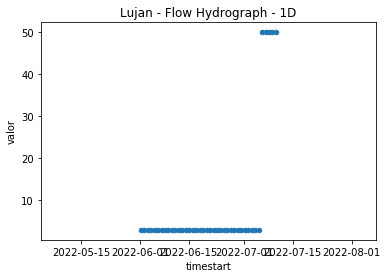

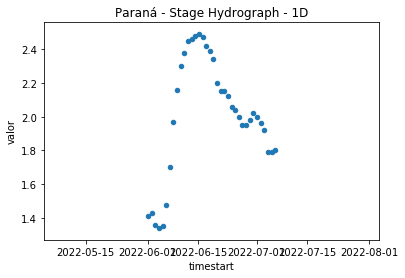

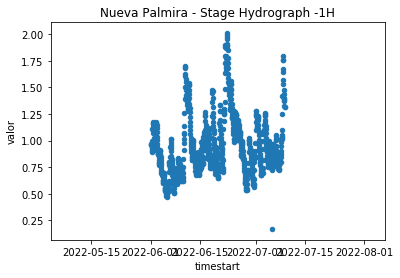

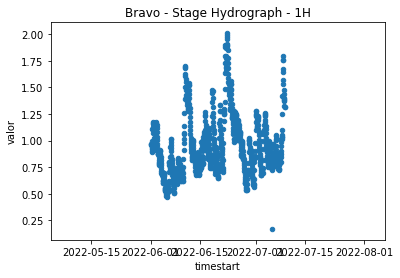

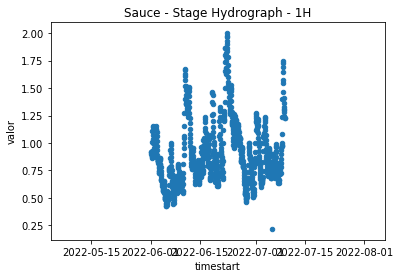

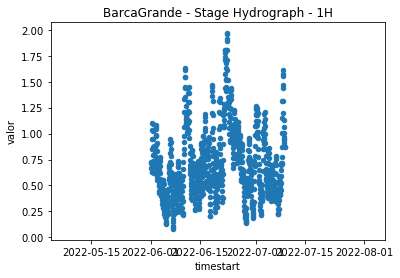

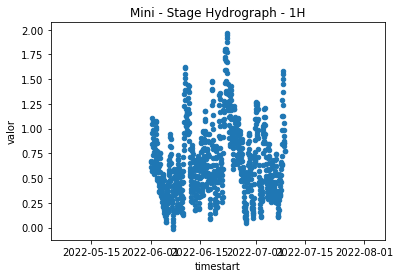

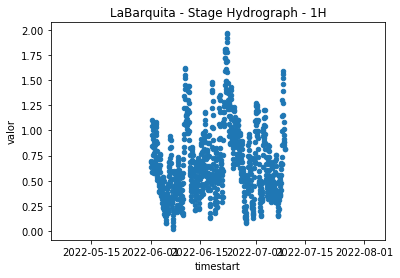

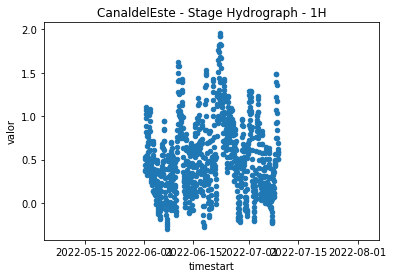

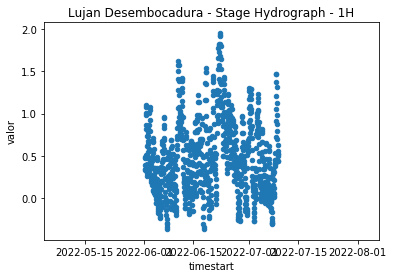

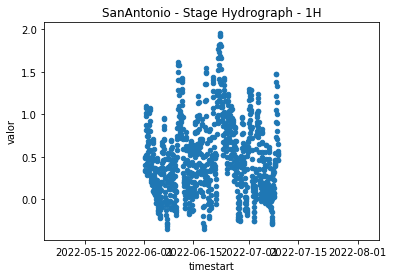

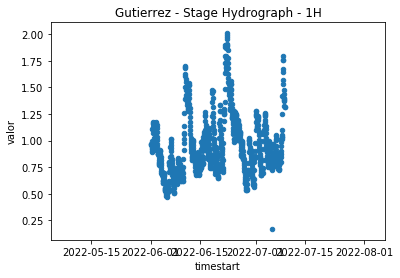

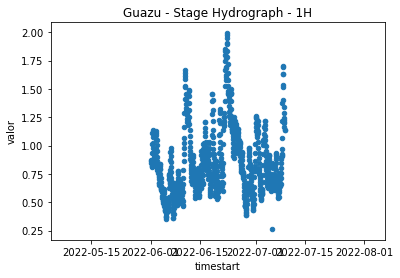

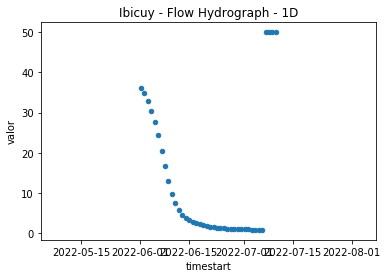

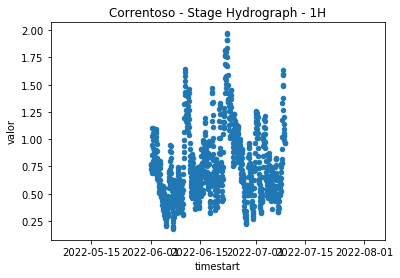

In [18]:

for borde in bordes_set.boundaries:
    if hasattr(borde.series[0],"obs_df"):
        df = borde.series[0].obs_df.reset_index() # .plot(y="valor")
        df.plot(kind="scatter",x="timestart",y="valor",title=borde.name)
plt.show()


In [19]:
#### output to file (csv and json)
# csv = bordes_set.toCSV()
bordes_set.saveData("tmp/bordes_288_short.csv",pivot="true")
bordes_set.saveData("tmp/bordes_288_short.json","json")


/home/leyden/git_clones/pydrodelta/pydrodelta/analysis.py:138: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obs_df = self.series[0].obs_df[self.series[0].obs_df.valor.notnull()]
/home/leyden/git_clones/pydrodelta/pydrodelta/analysis.py:139: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obs_df["timestart"] = obs_df.index
/home/leyden/git_clones/pydrodelta/pydrodelta/analysis.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [ ]:

#### upload to a5
#upload all
bordes_set.uploadData()
# upload only one boundary
bordes_set.boundaries[2].uploadData()


In [15]:
bordes_set.boundaries[0].series[5].obs_df.tail(24)

,valor
timestart,
2022-07-09 01:00:00-03:00,0.522560
2022-07-09 02:00:00-03:00,0.501850
2022-07-09 03:00:00-03:00,0.437449
2022-07-09 04:00:00-03:00,0.437449
2022-07-09 05:00:00-03:00,NaN
2022-07-09 06:00:00-03:00,NaN
2022-07-09 07:00:00-03:00,NaN
2022-07-09 08:00:00-03:00,NaN
2022-07-09 09:00:00-03:00,NaN
